In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline

## Random walkers in Numpy



In [4]:
#a) Set up a Numpy array by initializing N walkers at the origin.

N = 100 #Number of random walkers
deltaP = 1 #Distance of each step


start_pos = np.zeros((N, 2)) #Initial position of each walker

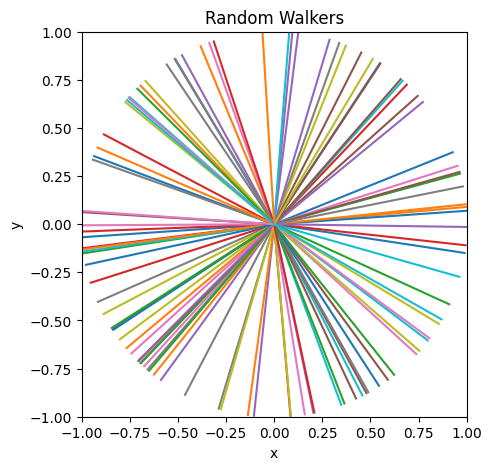

In [5]:
#b) Advance each 
#Calculate steps
def take_step(N = N, deltaP = deltaP):
    step_direction = np.random.rand(N, 1) * 2 * np.pi #Random direction of each walker
    x = np.cos(step_direction) * deltaP #Step in x direction
    y = np.sin(step_direction) * deltaP #Step in y direction
    steps = np.array([x, y]).T #Combine x and y steps
    return steps



current_pos = start_pos + take_step(N, deltaP)[0] #Current position of each walker

#print(len(current_pos))
#print(current_pos)


fig, ax = plt.subplots(figsize = (5, 5))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.set_title('Random Walkers')
ax.set_xlabel('x')
ax.set_ylabel('y')

for init, end in zip(start_pos, current_pos):
    ax.plot([init[0], end[0]], [init[1], end[1]], '-')

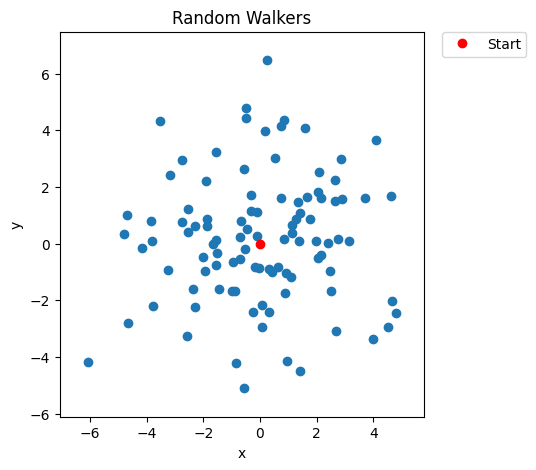

In [6]:
#c) Make the walkers take N_steps in random directions and plot the end result

N_steps = 10 #Number of steps each walker takes
start_pos = np.zeros((N, 2))
current_pos = start_pos

positions = start_pos
for i in range(N_steps):
    current_pos += take_step()[0]
    positions = np.dstack((positions, current_pos))

fig,ax = plt.subplots(figsize = (5, 5))
ax.set_xlim(np.min(current_pos[:,0] - 1), np.max(current_pos[:,0] + 1))
ax.set_ylim(np.min(current_pos[:,1] - 1), np.max(current_pos[:,1] + 1))
ax.set_aspect('equal')
ax.set_title('Random Walkers')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(current_pos[:, 0], current_pos[:, 1], 'o')
ax.plot(0,0, 'ro', label = 'Start')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


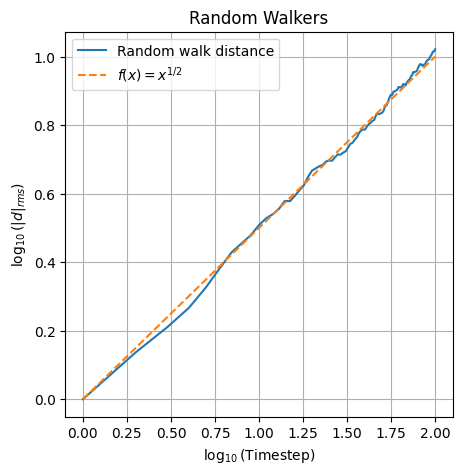

In [7]:
#d) Calculate and save distance from origin for each walker at each step

def current_distance(current_pos, origin = [0, 0]):
    distance = np.sqrt((current_pos[:, 0] - origin[0])**2 + (current_pos[:, 1] - origin[1])**2)
    return np.array([[d] for d in distance])

N_steps = 100 #Number of steps each walker takes
start_pos = np.zeros((N, 2))
current_pos = start_pos

# Make arrays for storing positions, timsteps and rms of the distances.
positions = start_pos
time_steps = np.arange(1,N + 1)

d_rms = np.array([])

#For each iteration, calculate the current distance and save it in d_rms:
for i in range(N_steps):
    current_pos += take_step()[0]
    positions = np.dstack((positions, current_pos))
    distance_current = current_distance(current_pos)
    
    d_rms = np.append(d_rms, np.sqrt(np.mean(distance_current**2)) )

fig,ax = plt.subplots(figsize = (5, 5))

ax.set_title('Random Walkers')
ax.set(xlabel= r'$\log_{10}$(Timestep)', ylabel=r'$\log_{10}(|d|_{rms})$')

#Convert to log-log:
time_steps = np.log10(time_steps)
d_rms = np.log10(d_rms)
ax.plot(time_steps, d_rms, label = 'Random walk distance')
ax.plot(time_steps, 1/2 * time_steps, '--', label = r'$f(x) = x^{1/2}$')
ax.grid()
ax.legend()




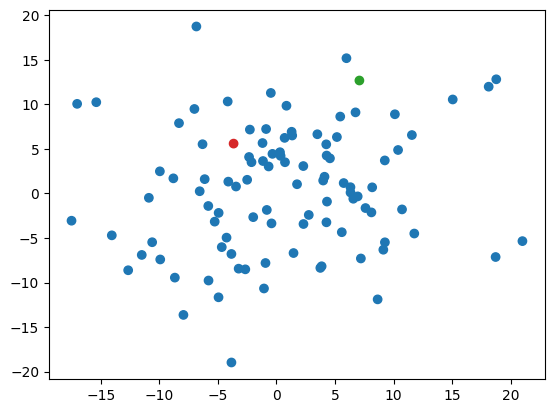

In [8]:
#e) Plot the walkers using scatter:

#Create a list of colors with two of other colors:
color_list = ['tab:blue' for index in current_pos]
color_list[0] = 'tab:red'
color_list[1] = 'tab:green'
fig, ax = plt.subplots()


ax.scatter(current_pos[:,0], current_pos[:,1], color = color_list)


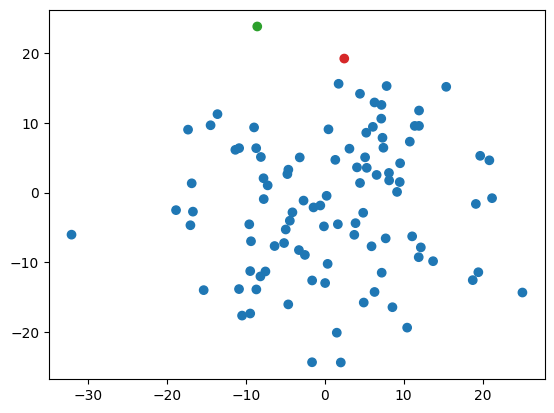

In [9]:
#f) Animation of the random walkers:

N_steps = 200 #Number of steps each walker takes
start_pos = np.zeros((N, 2))
current_pos = start_pos

# Make arrays for storing positions, timsteps and rms of the distances.
positions = start_pos


#For each iteration, calculate the current distance and save it in d_rms:
for i in range(N_steps):
    current_pos += take_step()[0]
    positions = np.dstack((positions, current_pos))


color_list = ['tab:blue' for index in current_pos]
color_list[-2] = 'tab:red'
color_list[-1] = 'tab:green'
fig, ax = plt.subplots()

zorders = [0 for index in current_pos]
zorders[0] = 10
zorders[1] = 10
scatters = ax.scatter(current_pos[:,0], current_pos[:,1], color = color_list)


def animate(i):
    scatters.set_offsets(positions[:,:,i])
    return ax


In [10]:

anim = animation.FuncAnimation(fig, animate, frames = N_steps, interval = 100, blit = False, repeat = False)
anim.save('Animations\\random_walkers.gif', writer='imagemagick', fps=10)


# Exercise 4: Random Walker Class



In [11]:
class Walker():

    def __init__(self, color):
        self.color = color
        self.position = np.array([0.,0.])
        self.marker = None
        self.stepsize = 1
        #self.d_rms = np.array([0])


    def distance(self, origin = [0, 0]):
        current_distance = np.sqrt((self.position[0] - origin[0])**2 + (self.position[1] - origin[1])**2)
        return current_distance

    def move(self):
        step_direction = np.random.rand() * 2 * np.pi #Random direction of each walker
        x = np.cos(step_direction) * self.stepsize #Step in x direction
        y = np.sin(step_direction) * self.stepsize #Step in y direction
        self.position += np.array([x, y])
        #self.d_rms = np.append(self.d_rms, np.sqrt(np.mean(self.distance()**2)) )
    
    def run(self, N):
        for i in range(N):
            self.move()
            yield self.position
        


def plot_all_walkers(ax,walkers_to_plot):
    artist = ax.scatter([w.position[0] for w in walkers_to_plot], [w.position[1] for w in walkers_to_plot],
                  color=[w.color for w in walkers_to_plot])
    return artist

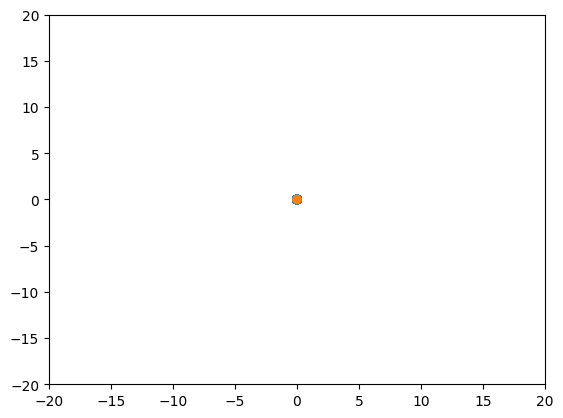

In [12]:
fig, ax = plt.subplots()
ax.set(xlim=(-20,20), ylim =(-20, 20))

number_of_walkers = 100
walkers = [Walker('tab:blue') for i in range(number_of_walkers)]
walkers[-1].color = 'tab:orange'
artist = plot_all_walkers(ax, walkers)


In [13]:


def update(i):
    for walker in walkers:
        walker.move()
    
    artist.set_offsets([w.position for w in walkers])
    return artist

anim = animation.FuncAnimation(fig, update, frames = 100, interval = 100, blit = False)
anim.save('Animations\\walker_objects.gif', writer='pillow', fps=10)

C:\Users\tobia\AppData\Local\Temp\ipykernel_20996\189029365.py:22: RuntimeWarning: divide by zero encountered in log10
  steps = np.log10(steps)
C:\Users\tobia\AppData\Local\Temp\ipykernel_20996\189029365.py:23: RuntimeWarning: divide by zero encountered in log10
  d_rms = np.log10(d_rms[:-1])


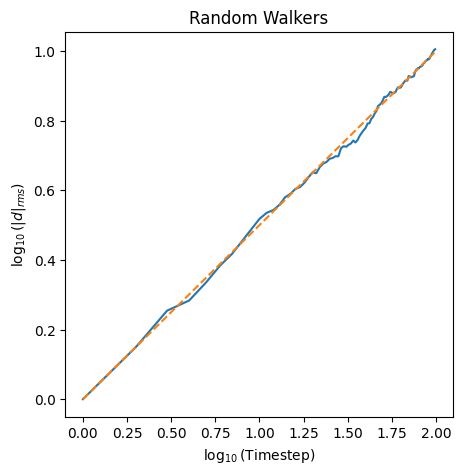

In [14]:


distances = []
steps = np.arange(0,100)

d_rms = np.array([0])

walkers = [Walker('tab:blue') for i in range(number_of_walkers)]

d_rms = np.array([0])
for i in steps:
    distances = np.array([])
    for walker in walkers:
        walker.move()
        distances = np.append(distances, walker.distance())      

    d_rms = np.append(d_rms, np.sqrt(np.mean(distances**2)) )


fig,ax = plt.subplots(figsize = (5, 5))

ax.set_title('Random Walkers')
ax.set(xlabel= r'$\log_{10}$(Timestep)', ylabel=r'$\log_{10}(|d|_{rms})$')
steps = np.log10(steps)
d_rms = np.log10(d_rms[:-1])
ax.plot(steps, d_rms, label = 'Random walk distance')
ax.plot(steps, 1/2 * steps, '--', label = r'$f(x) = x^{1/2}$')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
